# CC3001 Otoño 2023 Tarea 1 [Nicolás Arancibia]

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Introducción
El objetivo de esta tarea es estudiar un problema inspirado en un fenómeno físico, a través de un modelo matemático, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= “” width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso continúa hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= “” width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, la regla es que si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales.

Para simular este proceso, supondremos que cada celda almacena un número entero, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las celdas que aparecen vacías tienen cero granos), desde la configuración

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= “” width="100">

se pasaría a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= “” width="100">

Cuando hay más de una casilla con exceso de granos de arena, la regla se puede aplicar a ellas en cualquier orden y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuración inicial, y luego aplicar esta regla en todos los casilleros que se pueda, hasta que no quede ninguno que tenga 4 o más granos de arena. Esa configuración final la vamos a visualizar asignando un color distinto a cada número de granos.

En particular, nos va a interesar estudiar lo que ocurre cuando la configuración inicial tiene todas las celdas vacías, excepto la del centro, en la cual hay $N$ granos de arena (donde $N$ es un parámetro del problema).

Note que en teoría el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. Para su simulación, usted debe calcular un tamaño del tablero lo suficientemente grande como para estar seguro que ningún grano de arena se salga hacia afuera de los bordes (calcule la máxima área que se puede cubrir con $N$ granos de arena, y después calcule cuan grande debe ser el tablero  para poder contener esa área).

# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos. Además, debe visualizar en la pantalla el tablero resultante, usando los métodos que se describen más adelante. 

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.



Escriba a continuación la definición de su función:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math


def arena(N):
  # escriba su código aquí
  if N < 64:
   r = int((math.sqrt(N/4))*1.5)
  else:
    r = int((math.sqrt(N/4)))
  mat = np.zeros((2*r, (2*r)+1))
  rep = 0
# se define una función auxiliar que detecta si una casilla del tablero contiene 4 granos de arena o más
  def auxiliar(l):
   for i in range(1, (2*r) - 1):
    for j in range(1, (2*r) - 1):
      if mat[i][j] >= 4:
        return True
  # Punto de partida
  mat[r][r] = N
  c = 0
  while mat[r][r] >= 4:
   mat[r+1][r] = c + 1
   mat[r][r+1] = c + 1
   mat[r-1][r] = c + 1
   mat[r][r-1] = c + 1
   mat[r][r] -= 4
   c += 1
   rep += 1
  # Estudio de TODAS las coordenadas
  while auxiliar(mat) == True:
   for i in range(1, (2*r)-1):
    for j in range(1, (2*r)-1): 
      if mat[i][j] >= 4: 
       mat[i][j] -= 4
       mat[i+1][j] += 1
       mat[i-1][j] += 1
       mat[i][j+1] += 1
       mat[i][j-1] += 1
       rep += 1   
     
  print("reparticiones:", rep)
  plt.matshow(mat)
  plt.show()

Explique aquí cómo calculó el tamaño que necesita tener el tablero.

El tamaño del tablero se determinó con la cantidad de granos de arena como el área de un círculo, tal que así se despeja el radio de la circunferencia y ese radio sea el tamaño del lado del tablero. Finalmente se ponderó el radio obtenido por 1.5 para los valores de N que sean menores que 64, ya que sin esta ponderación el algoritmo no funciona de forma idónea, puesto que el tamaño del tablero no es suficiente como para mostrar la figura entera.

Ahora ejecute la función para $N=128$:

reparticiones: 342


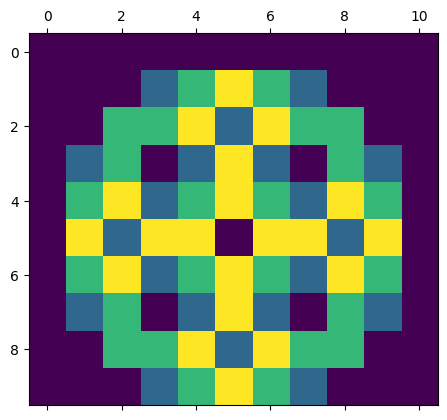

In [ ]:
arena(128)

A continuación ejecute la función para el valor más grande de $N$ que consiga alcanzar en un tiempo razonable:

reparticiones: 5270626


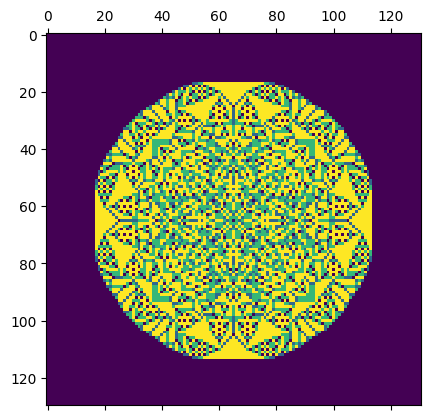

In [ ]:
arena(17000) # reemplace N por el valor máximo que alcanzó a procesar
# determiné como tiempo razonable un límite de 2 minutos aproximadamente

## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería mejor quitar de una sola vez lo más que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que si en una celda hay un número de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales. Escriba una versión modificada de su función de acuerdo a esta nueva regla.



In [ ]:
def arena2(N):
  # escriba su código aquí
  if N < 64:
   r = int((math.sqrt(N/4))*1.5)
  else:
    r = int((math.sqrt(N/4)))
  mat = np.zeros((2*r, 2*r + 1))
  rep = 0
  # se define nuevamente la función auxiliar mostrada anteriormente
  def auxiliar(l):
   for i in range(1, (2*r) - 1):
    for j in range(1, (2*r) - 1):
      if mat[i][j] >= 4:
        return True  
  # Punto de partida
  mat[r][r] = N
  t = N//4
  if mat[r][r] >= 4:
    mat[r+1][r] = t
    mat[r-1][r] = t
    mat[r][r+1] = t
    mat[r][r-1] = t
    mat[r][r] = N - 4*t
    rep += 1
  # Estudio de TODAS las coordenadas  
  while auxiliar(mat) == True:
    for i in range(1,2*r - 1):
      for j in range(1,2*r - 1):
        if mat[i][j] >= 4:
          c = mat[i][j]
          mat[i][j] = c - 4*(c//4)
          mat[i+1][j] += c//4
          mat[i-1][j] += c//4
          mat[i][j+1] += c//4
          mat[i][j-1] += c//4
          rep += 1
  print("reparticiones:", rep)
  plt.matshow(mat)
  plt.show()

Ahora ejecute la función para $N=128$:

reparticiones: 230


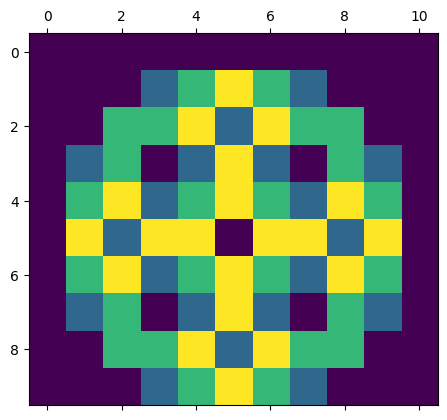

In [ ]:
arena2(128)

A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

reparticiones: 12772240


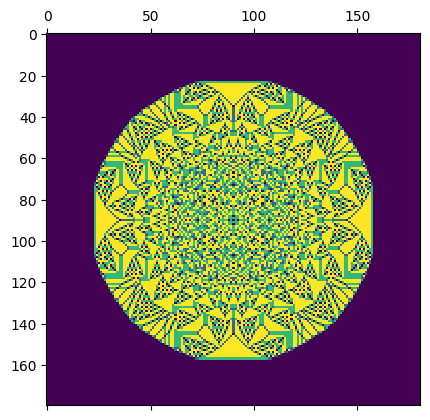

In [ ]:
arena2(33000) # reemplace N por el valor máximo que alcanzó a procesar, nuevamente se utiliza el límite de 2 minutos

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.

A continuación se muestra la tabla comparativa de reparticiones entre los dos algoritmos realizados:



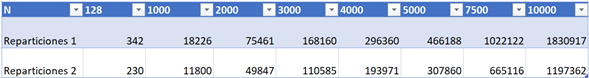

En la tabla se puede ver que con el segundo algoritmo se concreta lo pedido en una menor cantidad de reparticiones en comparación al primer algoritmo, haciendo del algoritmo de la parte 2 el más eficiente.

Para ver la reducción de reparticiones de forma más gráfica se creó el siguiente gráfico:

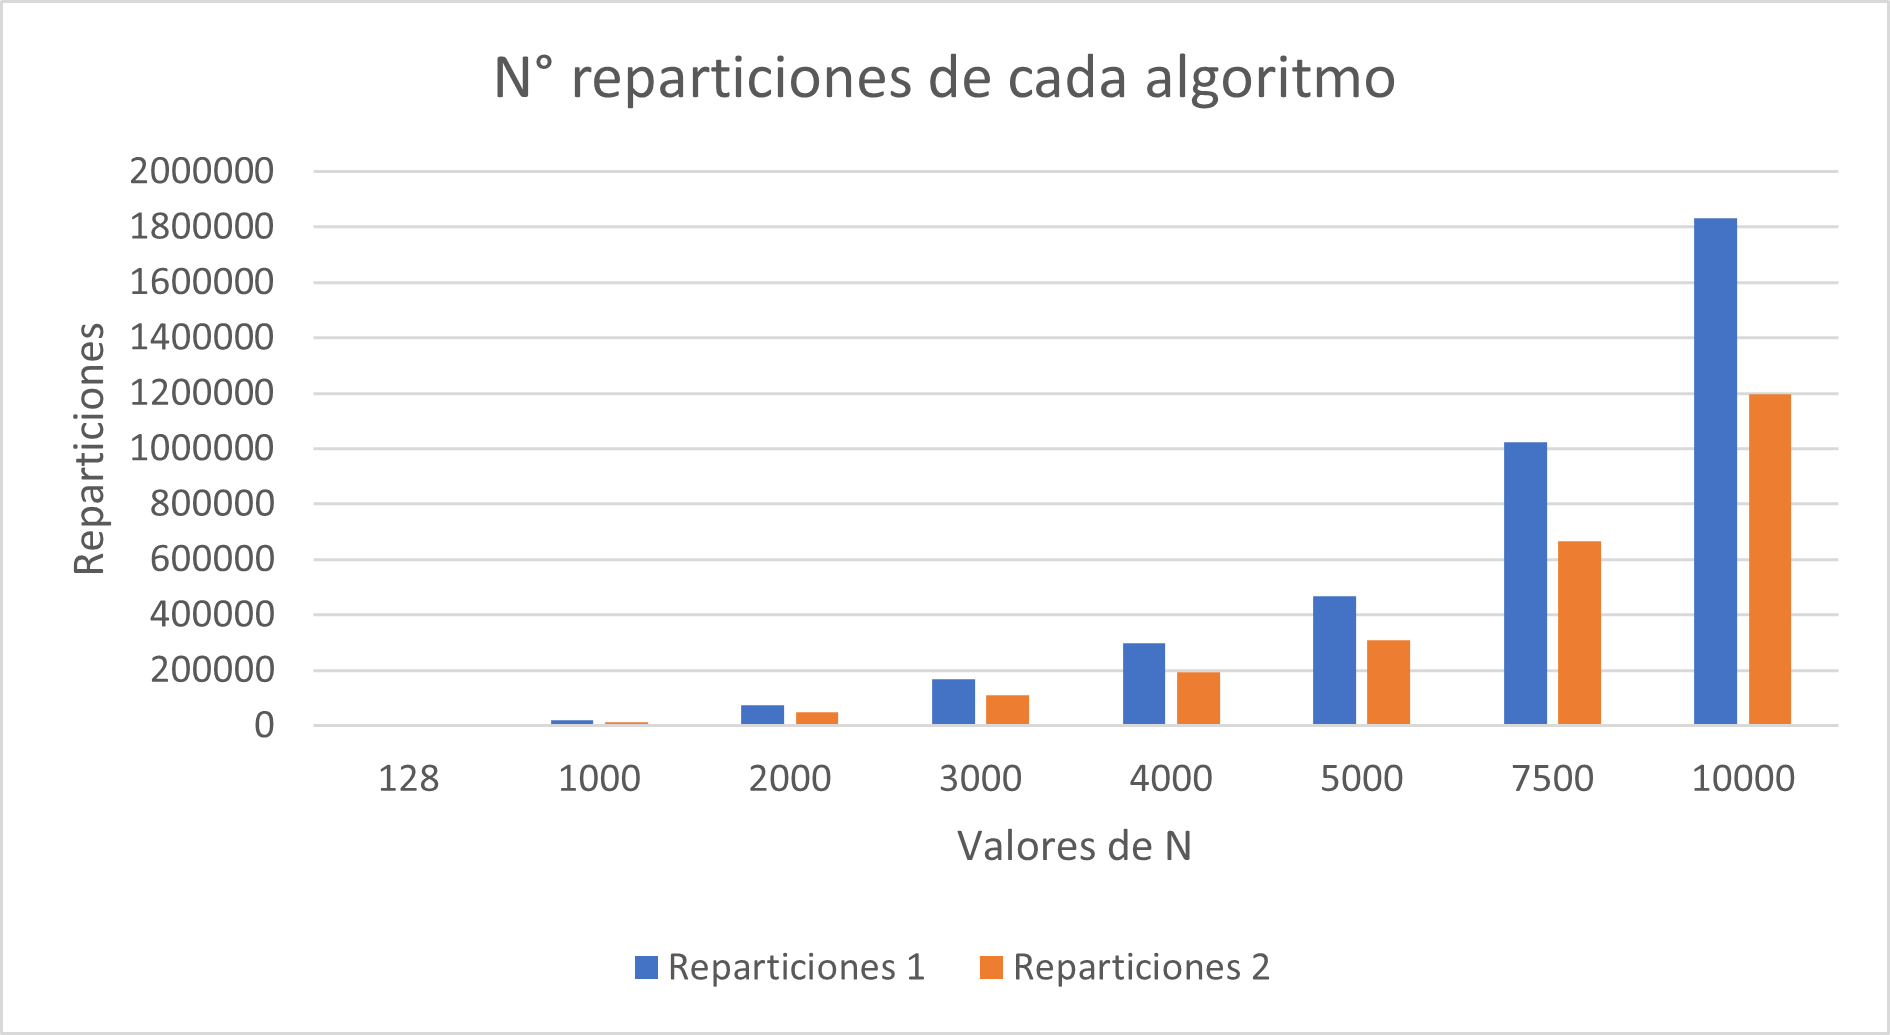

Habiendo realizado las respectivas comparaciones entre ambos algoritmos, se puede concluir que sí valió la pena la optimización, puesto que para repartir la misma cantidad de granos de arena, el segundo algoritmo lo hizo con muchas menos reparticiones que el primero (se redujo un 33% la cantidad de reparticiones aproximadamente). Además de que para un límite de 2 minutos, el algoritmo de la parte 2 alcanzó a repartir correctamente 33000 granos de arena, en cambio el algoritmo de la parte 1 repartió 17000.

\\

Otra posible optimización para este modelo podría ser que una vez que se detecte una casilla del arreglo tenga 16 o más granos de arena (tal que una casilla adyacente a la que primeramente tiene toda la arena reparta arena en un primer "barrido" del tablero), asignar primero la arena a las casillas más externas o más "alejadas", de esta forma se optimiza la cantidad de barridos por realizar. \\

Ejemplificando, si la casilla central tiene 16 granos de arena (en el modelo de la parte 2), reparte 4 granos de arena a sus casillas vecinas (una repartición), pero estas casillas al tener 4 granos, van a tener que repartir también (4 reparticiones adicionales), luego la casilla central vuelve a tener 4 granos de arena, por lo tanto tiene que repartir por una sexta vez para finalizar el proceso. En cambio con el modelo recién planteado, se agrega 1 grano de arena (en este ejemplo) a una distancia de 2 casillas de la casilla central (en las 4 direcciones), de tal forma que se reparten 3 granos en las casillas adyacentes y se evita que estas tengan 4 granos de arena, finalizando el proceso, para este algoritmo propuesto se realizó una repartición modificada de largo alcance, repartiendo solo una vez a comparación de las 6 reparticiones del otro modelo. Lo mostrado anteriormente es un ejemplo en menor escala, habría que probar si efectivamente es más eficiente para un N más grande.

# Visualización

Para la visualización se recomienda usar arreglos de Numpy y la librería Matplotlib. A continuación un código de ejemplo:

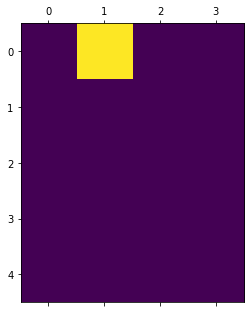

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crea una matriz de numpy llena de ceros de dimensión 5x4
mat = np.zeros((5,4))

#Asigna un uno en la posición (0,1)
mat[0][1] = 1

#Dibuja
plt.matshow(mat)
plt.show()

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.